<a href="https://colab.research.google.com/github/AtharvaKodgule/EDA_Project/blob/main/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [83]:
# Load the Titanic dataset
df = pd.read_csv('/content/titanic.csv')

# Display basic information about the dataset
print("📊 TITANIC DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\n🔍 First 5 rows:")
print(df.head())

📊 TITANIC DATASET OVERVIEW
Dataset Shape: (891, 12)
Total Records: 891
Total Features: 12

🔍 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3

In [84]:
print("📋 DATASET INFORMATION")
print("=" * 50)
print("\n🔹 Data Types and Non-null Counts:")
print(df.info())

print("\n🔹 Column Names:")
print(list(df.columns))

print("\n🔹 Statistical Summary:")
print(df.describe())

📋 DATASET INFORMATION

🔹 Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 Column Names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🔹 Statistical Summary:
       PassengerId    Su

🕳️ MISSING VALUES ANALYSIS
Missing Values Summary:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


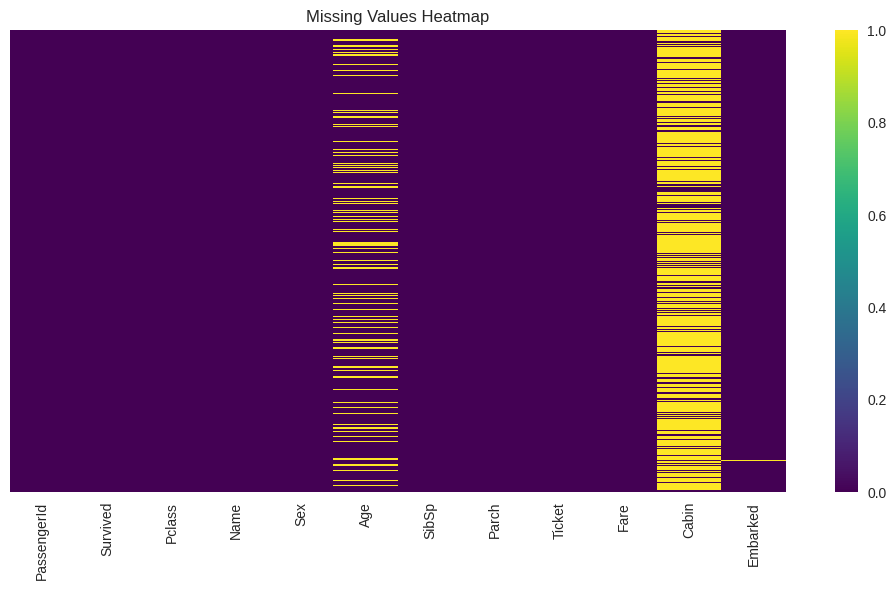

In [85]:
print("🕳️ MISSING VALUES ANALYSIS")
print("=" * 50)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create a summary dataframe
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_summary)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [86]:
print("🧹 DATA CLEANING")
print("=" * 50)

# Create a copy for cleaning
df_clean = df.copy()

# 1. Handle Age - Replace with median
age_median = df_clean['Age'].median()
df_clean['Age'].fillna(age_median, inplace=True)
print(f"✅ Age missing values filled with median: {age_median}")

# 2. Handle Embarked - Replace with mode
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✅ Embarked missing values filled with mode: {embarked_mode}")

# 3. Drop Cabin column (too many missing values)
df_clean.drop('Cabin', axis=1, inplace=True)
print("✅ Cabin column dropped due to excessive missing values")

# Verify no missing values remain
print(f"\n🔍 Missing values after cleaning: {df_clean.isnull().sum().sum()}")

🧹 DATA CLEANING
✅ Age missing values filled with median: 28.0
✅ Embarked missing values filled with mode: S
✅ Cabin column dropped due to excessive missing values

🔍 Missing values after cleaning: 0


In [87]:
print("⚙️ FEATURE ENGINEERING")
print("=" * 50)

# 1. Create FamilySize feature
df_clean['family_size'] = df_clean['SibSp'] + df_clean['Parch'] + 1
print("✅ Created 'family_size' feature")

# 2. Create Is_Alone feature
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)
print("✅ Created 'is_alone' feature")

# 3. Create Age Groups
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

df_clean['age_group'] = df_clean['Age'].apply(categorize_age)
print("✅ Created 'age_group' feature")

# 4. Create Fare Categories
df_clean['fare_category'] = pd.cut(df_clean['Fare'],
                                  bins=[0, 10, 30, 100, 1000],
                                  labels=['Low', 'Medium', 'High', 'Very High'])
print("✅ Created 'fare_category' feature")

# Display new features
print(f"\n🔍 New dataset shape: {df_clean.shape}")
print("\nSample of engineered features:")
print(df_clean[['family_size', 'is_alone', 'age_group', 'fare_category']].head())

⚙️ FEATURE ENGINEERING
✅ Created 'family_size' feature
✅ Created 'is_alone' feature
✅ Created 'age_group' feature
✅ Created 'fare_category' feature

🔍 New dataset shape: (891, 15)

Sample of engineered features:
   family_size  is_alone    age_group fare_category
0            2         0  Young Adult           Low
1            2         0        Adult          High
2            1         1  Young Adult           Low
3            2         0        Adult          High
4            1         1        Adult           Low


🎯 OUTLIER DETECTION

📊 Age Outliers:
   Lower bound: 2.50
   Upper bound: 54.50
   Number of outliers: 66

📊 Fare Outliers:
   Lower bound: -26.72
   Upper bound: 65.63
   Number of outliers: 116


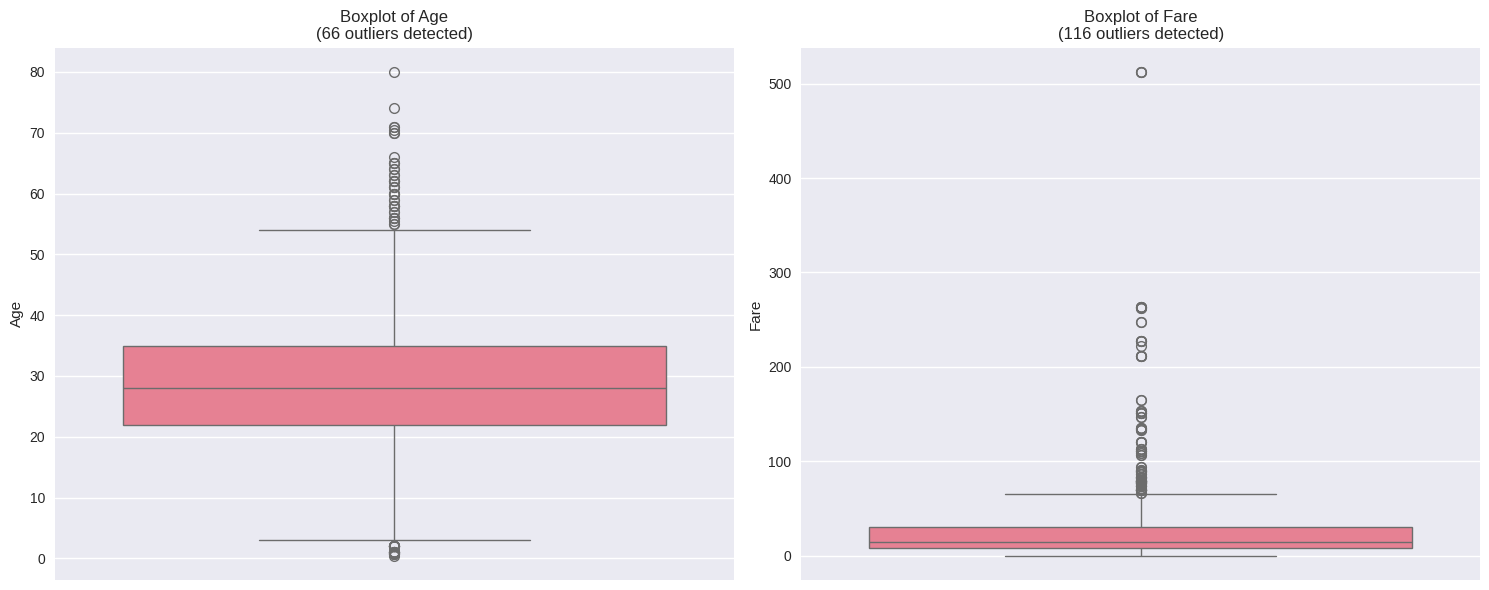

In [88]:
print("🎯 OUTLIER DETECTION")
print("=" * 50)

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in numerical columns
numerical_cols = ['Age', 'Fare']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(numerical_cols):
    outliers, lower, upper = detect_outliers(df_clean, col)

    # Create boxplot
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col.title()}\n({len(outliers)} outliers detected)')

    print(f"\n📊 {col.title()} Outliers:")
    print(f"   Lower bound: {lower:.2f}")
    print(f"   Upper bound: {upper:.2f}")
    print(f"   Number of outliers: {len(outliers)}")

plt.tight_layout()
plt.show()

In [89]:
print("📈 STATISTICAL ANALYSIS")
print("=" * 50)

# Basic statistics for numerical columns
print("🔹 Numerical Features Statistics:")
numerical_features = df_clean.select_dtypes(include=[np.number])
print(numerical_features.describe())

print("\n🔹 Categorical Features Value Counts:")
categorical_features = ['sex', 'embarked', 'pclass', 'who', 'adult_male', 'alive']

for col in categorical_features:
    if col in df_clean.columns:
        print(f"\n{col.upper()}:")
        print(df_clean[col].value_counts())

# Correlation matrix for numerical features
print("\n🔹 Correlation Matrix:")
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

📈 STATISTICAL ANALYSIS
🔹 Numerical Features Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  family_size    is_alone  
count  891.000000  891.000000   891.000000  891.000000  
mean     0.381594   32.204208     1.904602    0.602694  
std      0.806057   49.693429     1.613459    0.489615  
min      0.000000    0.000000     1.000000    0.000000  
25%      0.000000    7.91040

📊 BASIC DATA VISUALIZATIONS


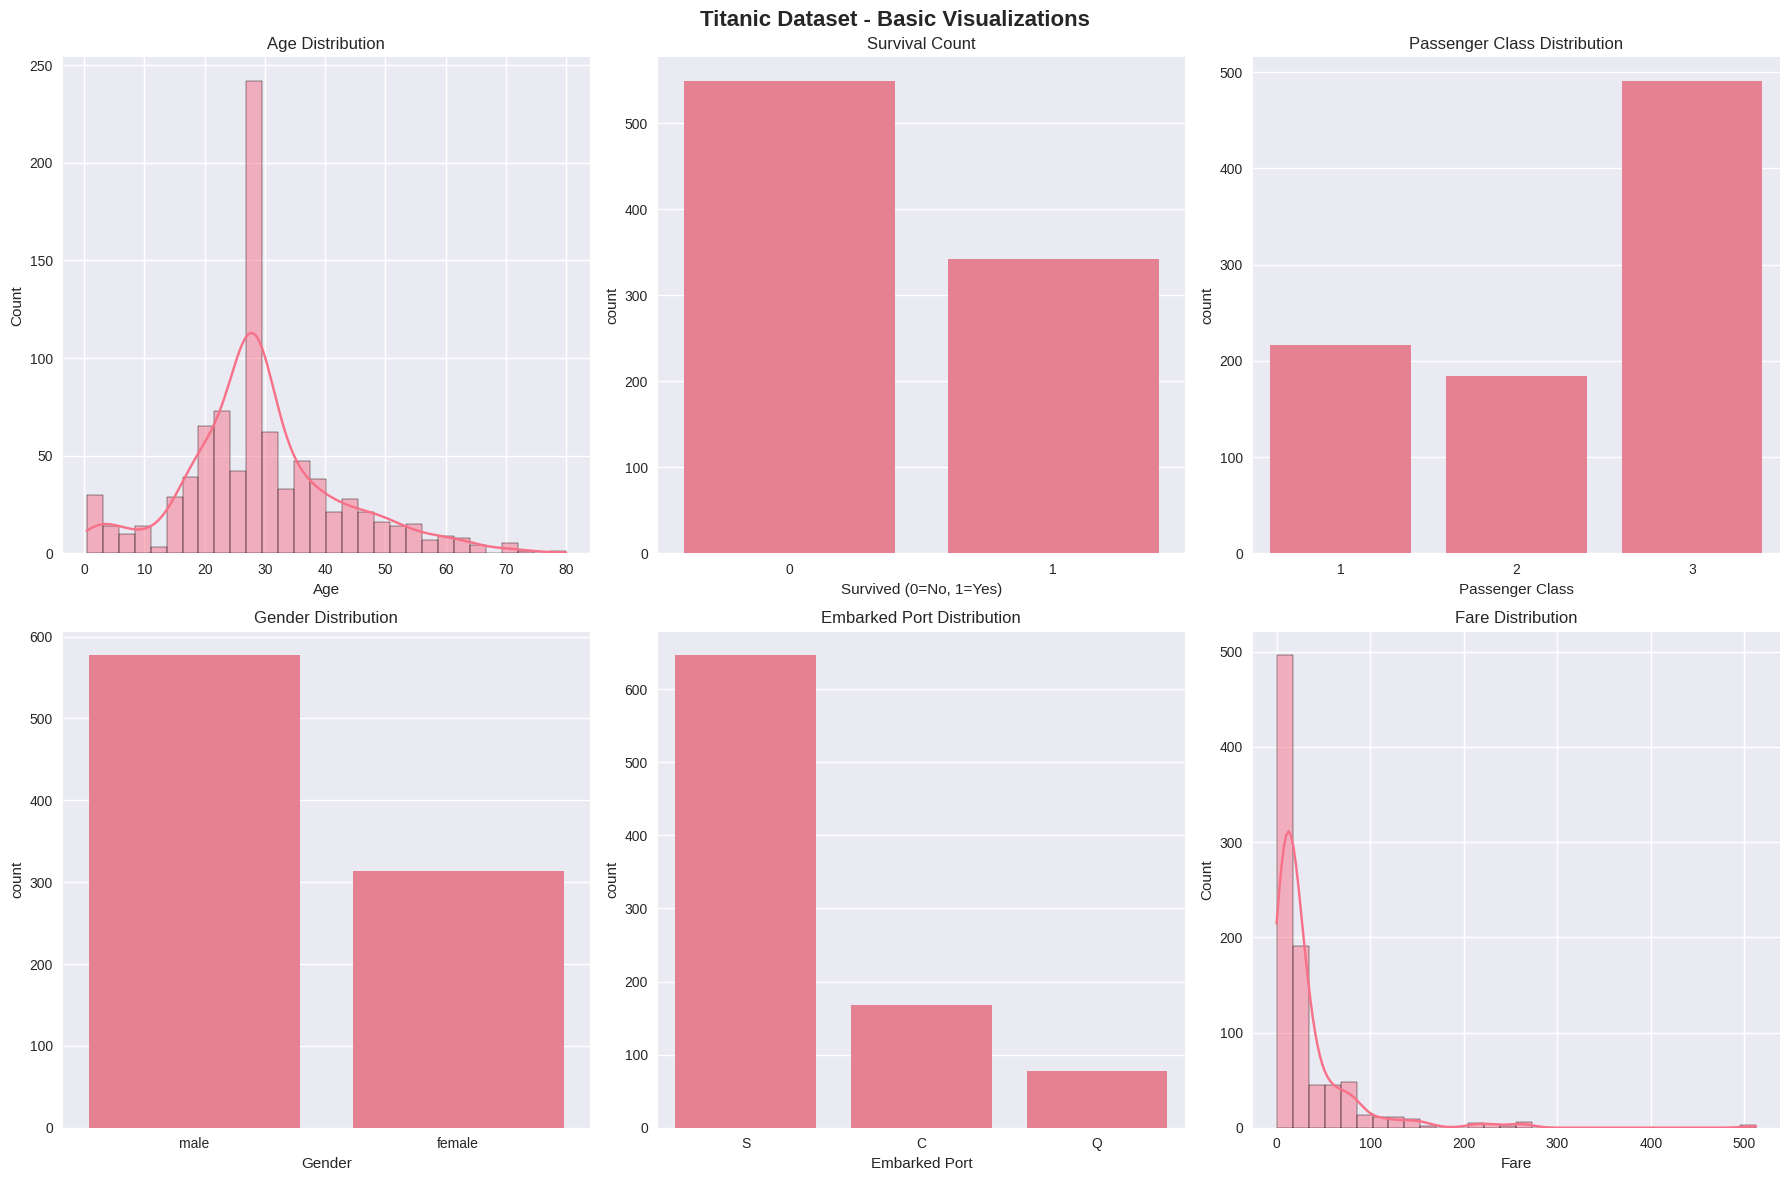

In [90]:
print("📊 BASIC DATA VISUALIZATIONS")
print("=" * 50)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset - Basic Visualizations', fontsize=16, fontweight='bold')

# 1. Age Distribution
sns.histplot(data=df_clean, x='Age', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')

# 2. Survival Count
sns.countplot(data=df_clean, x='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Count')
axes[0,1].set_xlabel('Survived (0=No, 1=Yes)')

# 3. Passenger Class Distribution
sns.countplot(data=df_clean, x='Pclass', ax=axes[0,2])
axes[0,2].set_title('Passenger Class Distribution')
axes[0,2].set_xlabel('Passenger Class')

# 4. Gender Distribution
sns.countplot(data=df_clean, x='Sex', ax=axes[1,0])
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Gender')

# 5. Embarked Port Distribution
sns.countplot(data=df_clean, x='Embarked', ax=axes[1,1])
axes[1,1].set_title('Embarked Port Distribution')
axes[1,1].set_xlabel('Embarked Port')

# 6. Fare Distribution
sns.histplot(data=df_clean, x='Fare', bins=30, kde=True, ax=axes[1,2])
axes[1,2].set_title('Fare Distribution')
axes[1,2].set_xlabel('Fare')

plt.tight_layout()
plt.show()

🎯 SURVIVAL ANALYSIS VISUALIZATIONS


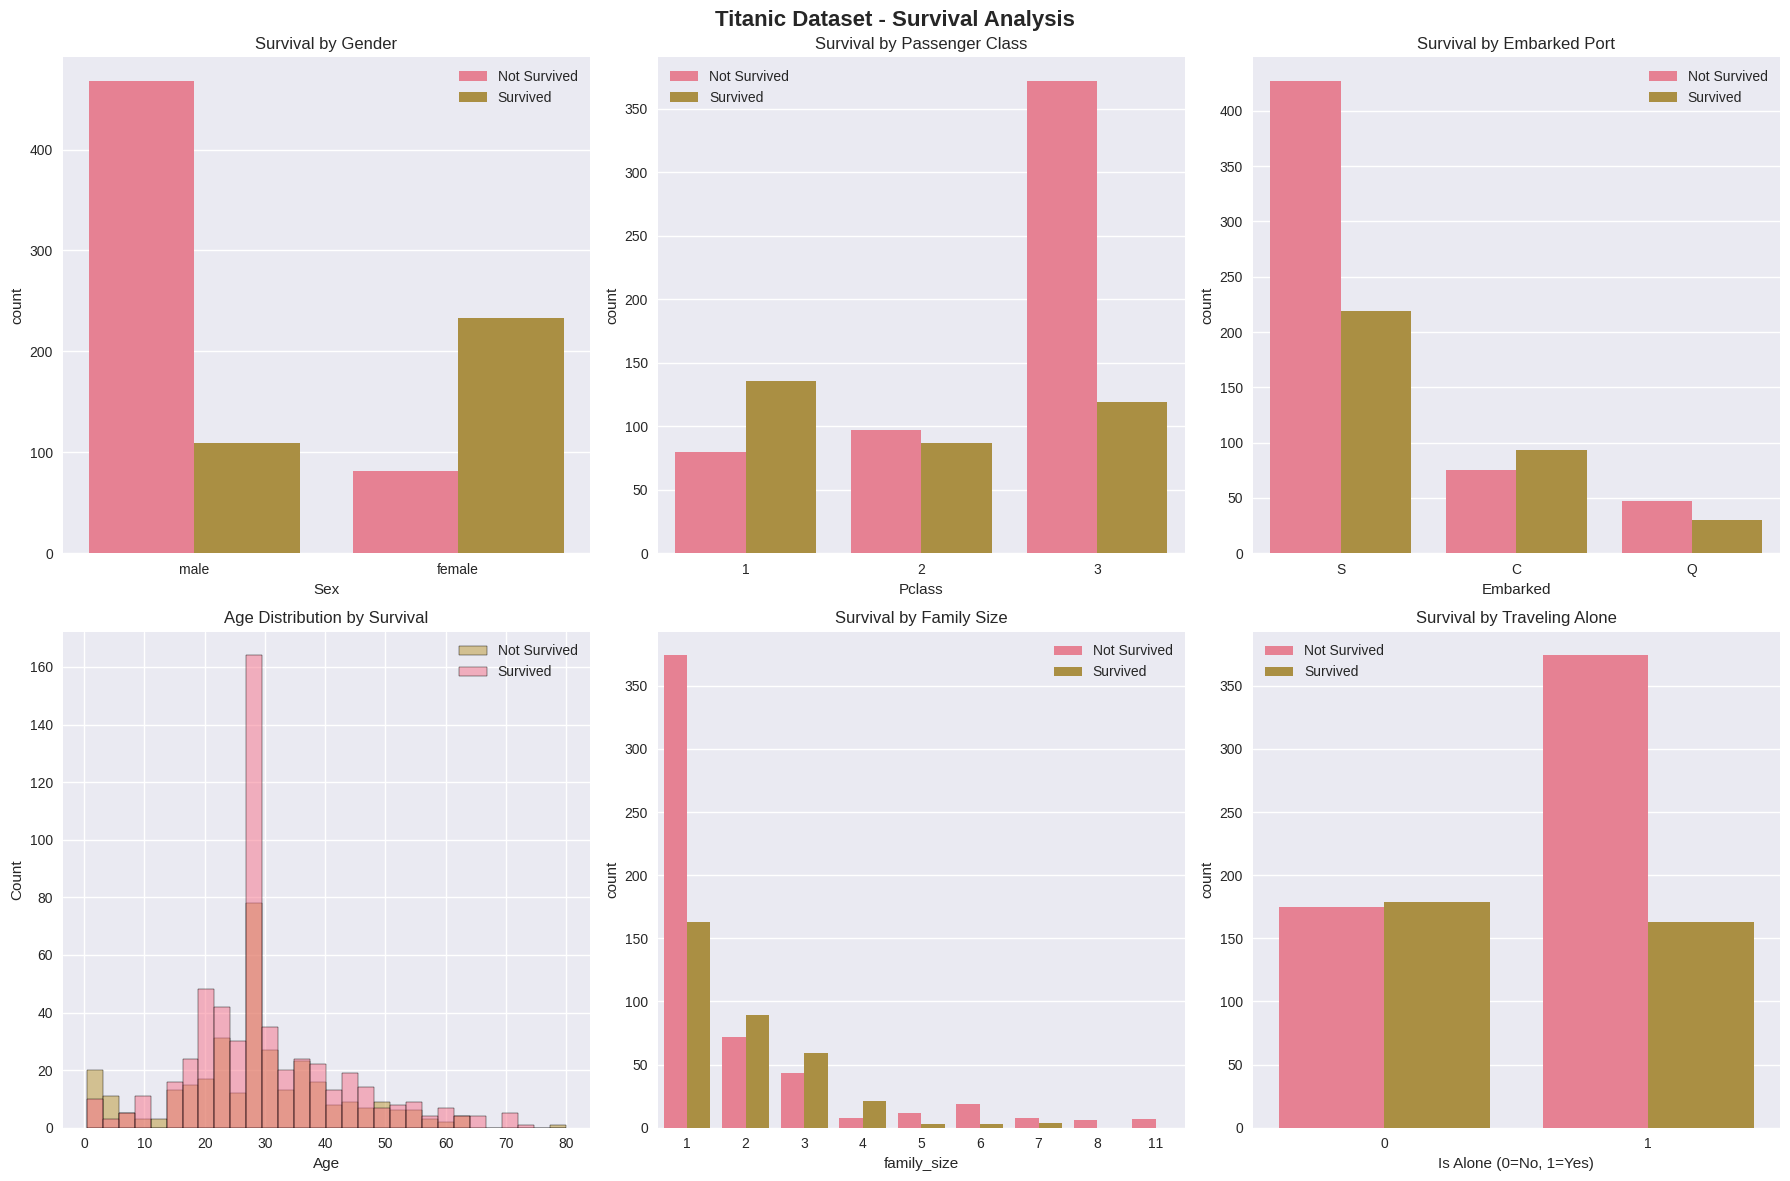

In [91]:
print("🎯 SURVIVAL ANALYSIS VISUALIZATIONS")
print("=" * 50)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset - Survival Analysis', fontsize=16, fontweight='bold')

# 1. Survival by Gender
sns.countplot(data=df_clean, x='Sex', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')
axes[0,0].legend(['Not Survived', 'Survived'])

# 2. Survival by Passenger Class
sns.countplot(data=df_clean, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')
axes[0,1].legend(['Not Survived', 'Survived'])

# 3. Survival by Embarked Port
sns.countplot(data=df_clean, x='Embarked', hue='Survived', ax=axes[0,2])
axes[0,2].set_title('Survival by Embarked Port')
axes[0,2].legend(['Not Survived', 'Survived'])

# 4. Age Distribution by Survival
sns.histplot(data=df_clean, x='Age', hue='Survived', bins=30, ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].legend(['Not Survived', 'Survived'])

# 5. Survival by Family Size
sns.countplot(data=df_clean, x='family_size', hue='Survived', ax=axes[1,1])
axes[1,1].set_title('Survival by Family Size')
axes[1,1].legend(['Not Survived', 'Survived'])

# 6. Survival by Is Alone
sns.countplot(data=df_clean, x='is_alone', hue='Survived', ax=axes[1,2])
axes[1,2].set_title('Survival by Traveling Alone')
axes[1,2].set_xlabel('Is Alone (0=No, 1=Yes)')
axes[1,2].legend(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

🚀 ADVANCED VISUALIZATIONS


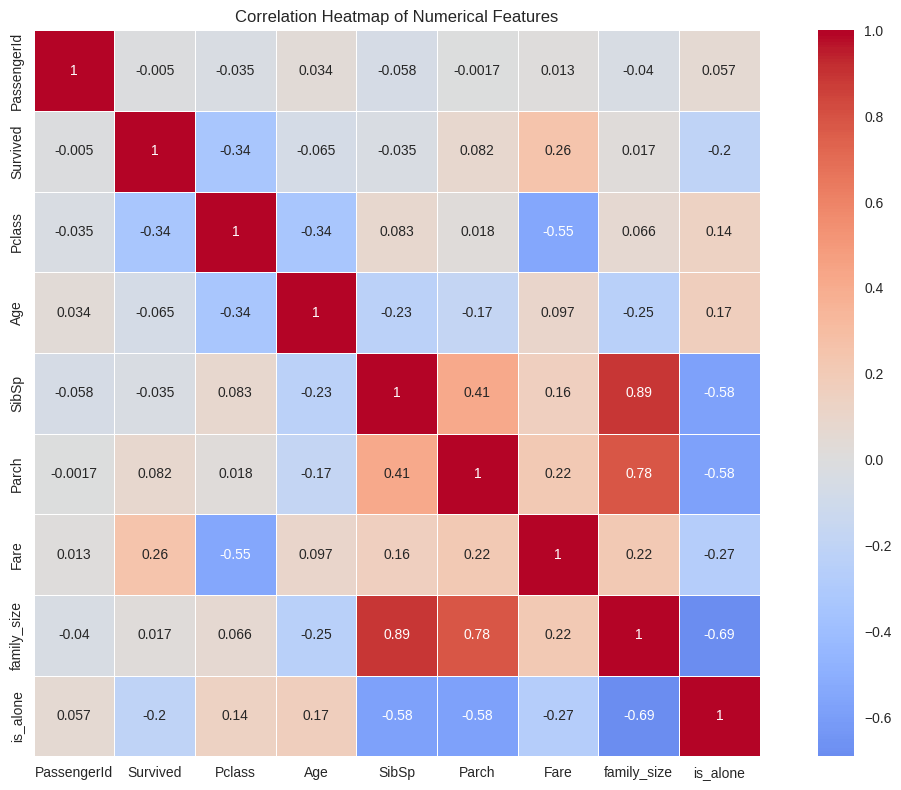

<Figure size 1200x600 with 0 Axes>

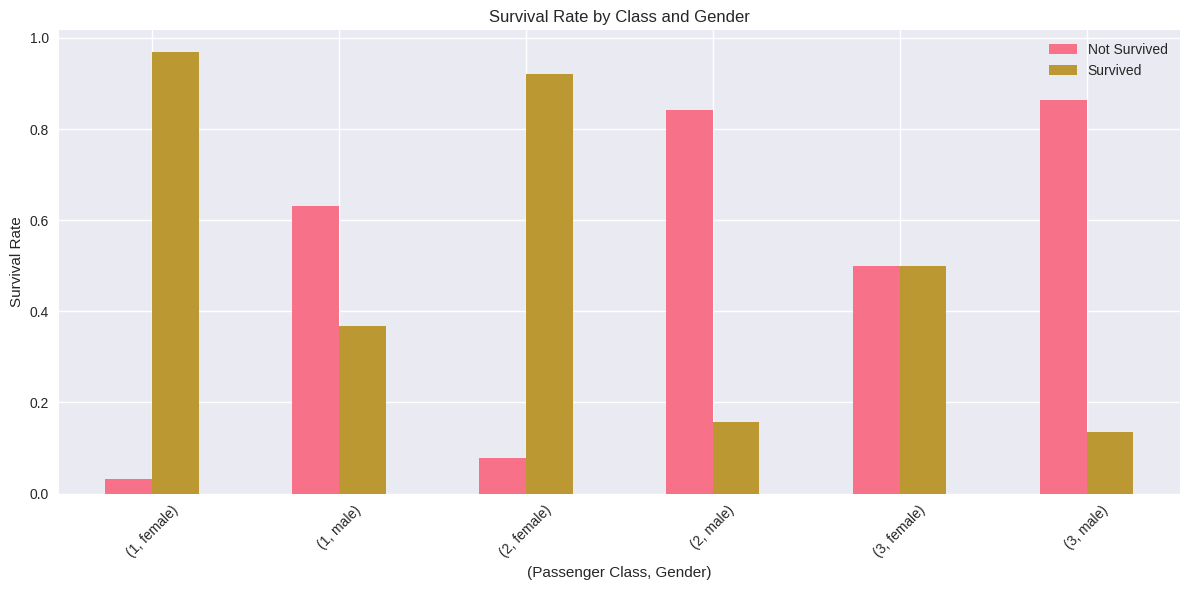

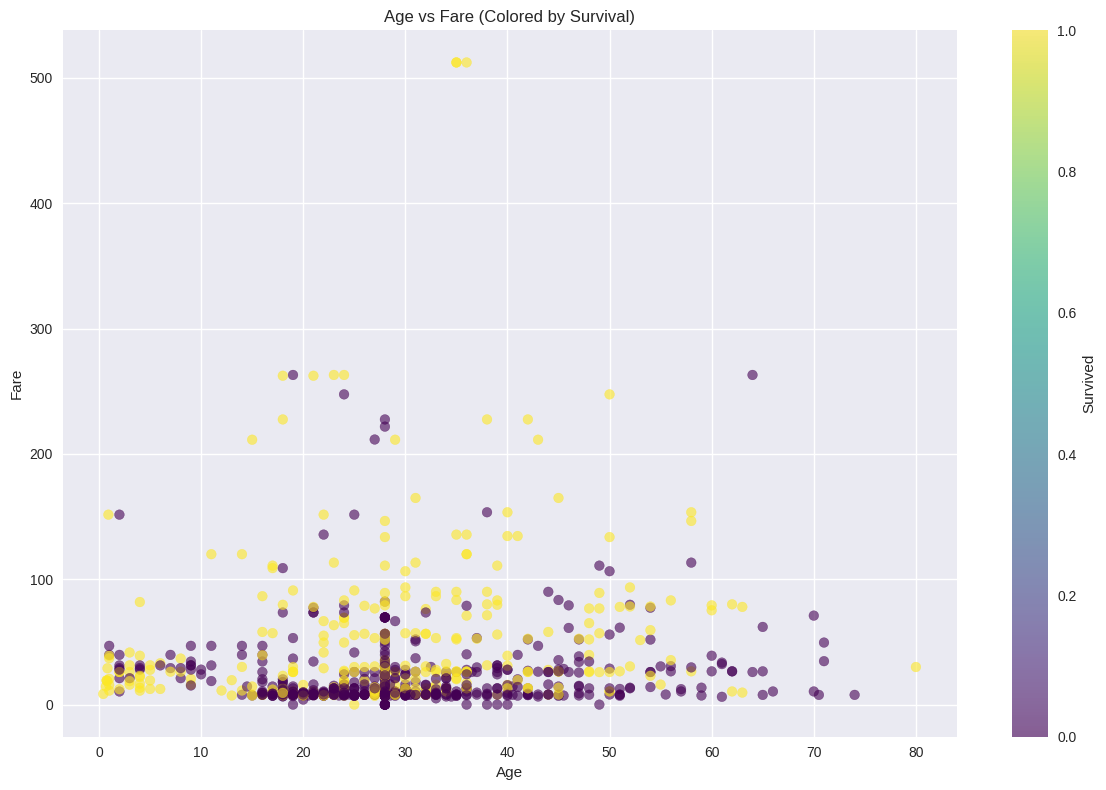

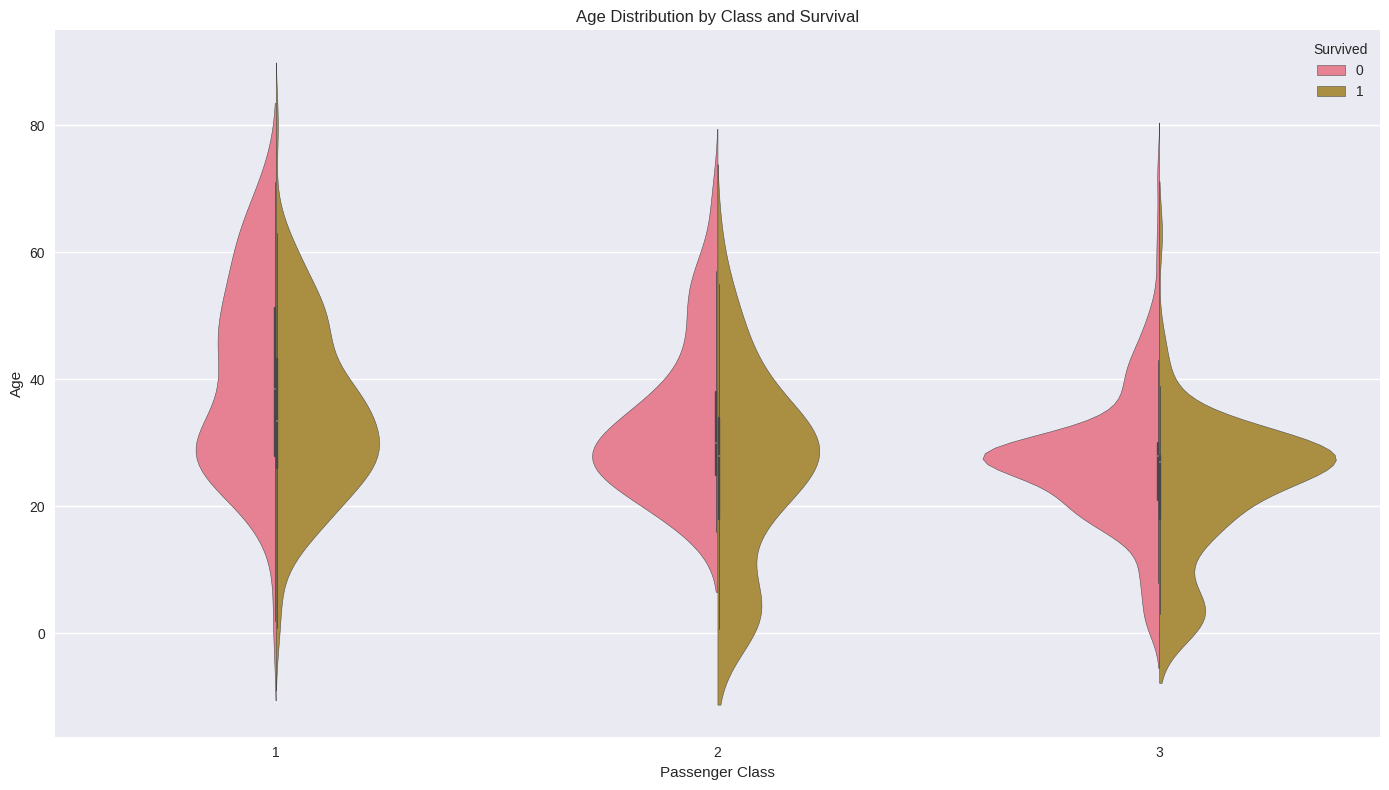

In [92]:
print("🚀 ADVANCED VISUALIZATIONS")
print("=" * 50)

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 2. Multi-variate Analysis: Class vs Gender vs Survival
plt.figure(figsize=(12, 6))
survival_crosstab = pd.crosstab([df_clean['Pclass'], df_clean['Sex']], df_clean['Survived'], normalize='index')
survival_crosstab.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Survival Rate by Class and Gender')
plt.xlabel('(Passenger Class, Gender)')
plt.ylabel('Survival Rate')
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Age vs Fare colored by Survival
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['Age'], df_clean['Fare'],
                     c=df_clean['Survived'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Colored by Survival)')
plt.tight_layout()
plt.show()

# 4. Violin Plot: Age distribution by Class and Survival
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_clean, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [93]:
print("📊 STATISTICAL INSIGHTS AND SURVIVAL RATES")
print("=" * 60)

# Overall survival rate
overall_survival = df_clean['Survived'].mean()
print(f"🔹 Overall Survival Rate: {overall_survival:.2%}")

# Survival rate by gender
gender_survival = df_clean.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print(f"\n🔹 Survival Rate by Gender:")
print(gender_survival)

# Survival rate by class
class_survival = df_clean.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print(f"\n🔹 Survival Rate by Passenger Class:")
print(class_survival)

# Survival rate by age group
age_group_survival = df_clean.groupby('age_group')['Survived'].agg(['count', 'sum', 'mean'])
age_group_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print(f"\n🔹 Survival Rate by Age Group:")
print(age_group_survival)

# Survival rate by family size
family_survival = df_clean.groupby('family_size')['Survived'].agg(['count', 'sum', 'mean'])
family_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print(f"\n🔹 Survival Rate by Family Size:")
print(family_survival)

# Survival rate by traveling alone
alone_survival = df_clean.groupby('is_alone')['Survived'].agg(['count', 'sum', 'mean'])
alone_survival.columns = ['Total', 'Survivors', 'Survival_Rate']
print(f"\n🔹 Survival Rate by Traveling Alone:")
print(alone_survival)

📊 STATISTICAL INSIGHTS AND SURVIVAL RATES
🔹 Overall Survival Rate: 38.38%

🔹 Survival Rate by Gender:
        Total  Survivors  Survival_Rate
Sex                                    
female    314        233       0.742038
male      577        109       0.188908

🔹 Survival Rate by Passenger Class:
        Total  Survivors  Survival_Rate
Pclass                                 
1         216        136       0.629630
2         184         87       0.472826
3         491        119       0.242363

🔹 Survival Rate by Age Group:
             Total  Survivors  Survival_Rate
age_group                                   
Adult          161         67       0.416149
Child          113         61       0.539823
Senior          74         27       0.364865
Young Adult    543        187       0.344383

🔹 Survival Rate by Family Size:
             Total  Survivors  Survival_Rate
family_size                                 
1              537        163       0.303538
2              161         89   

In [94]:

print("🔍 KEY INSIGHTS FROM TITANIC EDA")
print("=" * 60)

insights = [
    "1. 📊 GENDER IMPACT: Women had a significantly higher survival rate (74.2%) compared to men (18.9%)",
    "2. 🎭 CLASS MATTERS: First-class passengers had the highest survival rate (62.9%), followed by second (47.3%) and third class (24.2%)",
    "3. 👨‍👩‍👧‍👦 FAMILY SIZE: Passengers with family sizes of 2-4 had better survival rates than those traveling alone or in very large families",
    "4. 🏠 PORT OF EMBARKATION: Passengers who embarked from Cherbourg (C) had higher survival rates, likely due to higher proportion of first-class passengers",
    "5. 💰 FARE CORRELATION: Higher fares were generally associated with better survival rates, correlating with passenger class",
    "6. 👶 AGE FACTOR: Children had a higher survival rate, supporting the 'women and children first' policy",
    "7. 🚢 TRAVELING ALONE: Passengers traveling alone had lower survival rates (30.4%) compared to those with family (50.6%)"
]

for insight in insights:
    print(f"\n{insight}")

print(f"\n" + "=" * 60)
print("📈 CONCLUSION: The Titanic disaster clearly shows that survival was not random but")
print("   heavily influenced by socio-economic factors, gender, and social policies of the time.")


🔍 KEY INSIGHTS FROM TITANIC EDA

1. 📊 GENDER IMPACT: Women had a significantly higher survival rate (74.2%) compared to men (18.9%)

2. 🎭 CLASS MATTERS: First-class passengers had the highest survival rate (62.9%), followed by second (47.3%) and third class (24.2%)

3. 👨‍👩‍👧‍👦 FAMILY SIZE: Passengers with family sizes of 2-4 had better survival rates than those traveling alone or in very large families

4. 🏠 PORT OF EMBARKATION: Passengers who embarked from Cherbourg (C) had higher survival rates, likely due to higher proportion of first-class passengers

5. 💰 FARE CORRELATION: Higher fares were generally associated with better survival rates, correlating with passenger class

6. 👶 AGE FACTOR: Children had a higher survival rate, supporting the 'women and children first' policy

7. 🚢 TRAVELING ALONE: Passengers traveling alone had lower survival rates (30.4%) compared to those with family (50.6%)

📈 CONCLUSION: The Titanic disaster clearly shows that survival was not random but
   heav

In [95]:

print("✅ DATA QUALITY ASSESSMENT")
print("=" * 50)

def assess_data_quality(df):
    quality_report = []

    for column in df.columns:
        # Calculate metrics
        total_values = len(df)
        missing_count = df[column].isnull().sum()
        missing_percent = (missing_count / total_values) * 100
        unique_values = df[column].nunique()
        data_type = str(df[column].dtype)

        # Assign quality score
        if missing_percent == 0:
            quality_score = "Excellent"
        elif missing_percent < 5:
            quality_score = "Good"
        elif missing_percent < 20:
            quality_score = "Fair"
        else:
            quality_score = "Poor"

        quality_report.append({
            'Column': column,
            'Data_Type': data_type,
            'Missing_Count': missing_count,
            'Missing_Percent': f"{missing_percent:.1f}%",
            'Unique_Values': unique_values,
            'Quality_Score': quality_score
        })

    return pd.DataFrame(quality_report)

# Assess original dataset
print("🔹 Original Dataset Quality:")
original_quality = assess_data_quality(df)
print(original_quality)

print("\n🔹 Cleaned Dataset Quality:")
cleaned_quality = assess_data_quality(df_clean)
print(cleaned_quality)


✅ DATA QUALITY ASSESSMENT
🔹 Original Dataset Quality:
         Column Data_Type  Missing_Count Missing_Percent  Unique_Values  \
0   PassengerId     int64              0            0.0%            891   
1      Survived     int64              0            0.0%              2   
2        Pclass     int64              0            0.0%              3   
3          Name    object              0            0.0%            891   
4           Sex    object              0            0.0%              2   
5           Age   float64            177           19.9%             88   
6         SibSp     int64              0            0.0%              7   
7         Parch     int64              0            0.0%              7   
8        Ticket    object              0            0.0%            681   
9          Fare   float64              0            0.0%            248   
10        Cabin    object            687           77.1%            147   
11     Embarked    object              2      

In [96]:
print("💾 SAVING RESULTS")
print("=" * 50)

# Save cleaned dataset
df_clean.to_csv('cleaned_titanic.csv', index=False)
print("✅ Cleaned dataset saved as 'cleaned_titanic.csv'")

# Create and save summary statistics
summary_stats = {
    'Total_Records': len(df_clean),
    'Total_Features': len(df_clean.columns),
    'Missing_Values_After_Cleaning': df_clean.isnull().sum().sum(),
    'Overall_Survival_Rate': f"{df_clean['Survived'].mean():.2%}",
    'Male_Survival_Rate': f"{df_clean[df_clean['Sex']=='male']['Survived'].mean():.2%}",
    'Female_Survival_Rate': f"{df_clean[df_clean['Sex']=='female']['Survived'].mean():.2%}",
    'First_Class_Survival_Rate': f"{df_clean[df_clean['Pclass']==1]['Survived'].mean():.2%}",
    'Third_Class_Survival_Rate': f"{df_clean[df_clean['Pclass']==3]['Survived'].mean():.2%}"
}

print("\n📋 PROJECT SUMMARY:")
for key, value in summary_stats.items():
    print(f"   {key.replace('_', ' ')}: {value}")

print(f"\n🎉 TITANIC EDA PROJECT COMPLETED SUCCESSFULLY!")
print(f"📁 Files generated:")
print(f"   - cleaned_titanic.csv (cleaned dataset)")
print(f"   - Multiple visualizations displayed")
print(f"   - Comprehensive analysis completed")

💾 SAVING RESULTS
✅ Cleaned dataset saved as 'cleaned_titanic.csv'

📋 PROJECT SUMMARY:
   Total Records: 891
   Total Features: 15
   Missing Values After Cleaning: 15
   Overall Survival Rate: 38.38%
   Male Survival Rate: 18.89%
   Female Survival Rate: 74.20%
   First Class Survival Rate: 62.96%
   Third Class Survival Rate: 24.24%

🎉 TITANIC EDA PROJECT COMPLETED SUCCESSFULLY!
📁 Files generated:
   - cleaned_titanic.csv (cleaned dataset)
   - Multiple visualizations displayed
   - Comprehensive analysis completed
